# Case Study

You are working as a data analyst for a yacht and boat sales website. The marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed to help sellers to get more views of their boat, as well as stay on top of market trends.

They would like you to take a look at the recent data and help them learn more about the
characteristics of the most viewed boat listings in the last 7 days - is it the most expensive boats
that get the most views? Are there common features among the most viewed boats?


 Variables:
 - Price Character, boat price listed in different currencies (e.g.
EUR, Â£, CHF etc.) on the website
 - Boat Type Character, type of the boat
 - Manufacturer Character, manufacturer of the boat
 - Type Character, condition of the boat and engine type(e.g.
Diesel, Unleaded, etc.)
 - Year Built Numeric, year of the boat built
 - Length Numeric, length in meter of the boat
 - Width Numeric, width in meter of the boat
 - Material Character, material of the boat (e.g. GRP, PVC, etc.)
 - Location Character, location of the boat is listed
 - Number of views last 7 days Numeric, number of the views of the list last 7 days


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datacamp notes/Data Analyst Certification/boat_data.csv')

In [3]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [5]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

We see we have nulll values so we will work with them:
 - Manufacturer and Material are text type so we can drop these rows
 - Lenght and Width as they are numbers we can replace the values with the mean or median

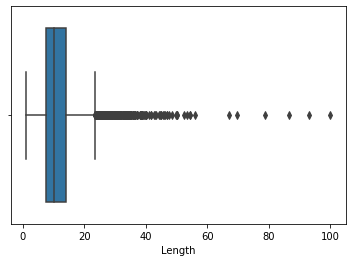

In [6]:
sns.boxplot(x='Length',data=df)
plt.show()

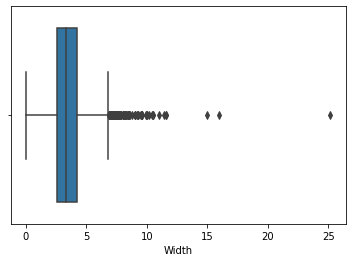

In [7]:
sns.boxplot(x='Width',data=df)
plt.show()

We see in both cases there are a lot of outliers so so replace the null values the mean is not the best value, so we will chose the median

In [8]:
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

Now that we don't have more nulls we continue

As we have a column that says the price and currency we will split them into two columns and then change them all to one currency

In [11]:
new = df['Price'].str.split(' ',n=1,expand=True)
df['Currency'] = new[0]
df['Price Value'] = new[1]
df['Price Value'] =pd.to_numeric(df['Price Value']) 

<ipython-input-11-d55ade23a19f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Currency'] = new[0]


In [12]:
df['Currency'].value_counts()

EUR    5867
CHF     884
Â£      218
DKK      68
Name: Currency, dtype: int64

We see we have 4 different currencies so we will change them into EUR to simplify our problem

In [13]:
df.loc[df['Currency'] == 'CHF', 'Price Value'] = df['Price Value']*0.96
df.loc[df['Currency'] == 'Â£', 'Price Value'] = df['Price Value']*1.20
df.loc[df['Currency'] == 'DKK', 'Price Value'] = df['Price Value']*0.13

When working with text variables Capitalization is sometimes a problem so we will change them all into lower cases

In [14]:
df['Boat Type'] = df["Boat Type"].str.lower() 

In [15]:
df['Location'] = df['Location'].str.lower()

In [16]:
df['Type'] = df["Type"].str.lower() 

In [17]:
df['Manufacturer'] = df["Manufacturer"].str.lower() 

In [18]:
df['Material'] = df["Material"].str.lower() 

In [19]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,Price Value
count,7037.000000,7037.000000,7037.000000,7037.000000,7.037000e+03
mean,1884.139548,11.035377,3.432845,160.098479,2.695101e+05
std,480.858536,5.139634,1.118345,167.114607,7.281498e+05
min,0.000000,1.980000,0.860000,13.000000,3.340800e+03
25%,1998.000000,7.300000,2.540000,72.000000,4.300000e+04
50%,2008.000000,9.950000,3.200000,112.000000,8.950000e+04
75%,2018.000000,13.500000,4.180000,186.000000,2.400000e+05
max,2021.000000,56.000000,16.000000,3263.000000,2.350000e+07


We will also get rid of boats buitl in the year 0

In [20]:
df = df[df['Year Built']!=0]

Now we wil filter our results and create a new table that contains the most viewed boats

In [21]:
most_viewed = df[df['Number of views last 7 days'] > 650].sort_values('Number of views last 7 days', ascending=False)
display(most_viewed.shape)

(129, 12)

In [22]:
a = most_viewed[['Boat Type','Manufacturer','Type','Year Built','Length','Width','Material','Location','Number of views last 7 days','Price Value']]
a.head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price Value
9580,motor yacht,bayliner power boats,"used boat,unleaded",1992,7.70,2.46,plastic,switzerland â» le landeron (ne),3263,14304.00
8723,hardtop,princess power boats,"used boat,diesel",1979,11.12,3.88,grp,switzerland â» neuenburgersee â» hauterive,2432,33600.00
6211,"bowrider,motor yacht,sport boat",windy power boats,"used boat,diesel",2002,12.35,3.48,grp,switzerland â» lago maggiore â» 6600 locarno,2261,120864.00
3700,hardtop,pershing power boats,"used boat,diesel",2009,20.30,5.20,grp,neustadt in holstein (ostsee),2154,949000.00
308,sport boat,sea ray power boats,"used boat,unleaded",1993,6.14,2.34,plastic,switzerland â» murtensee â» avenches,2026,19104.00
894,cabin boat,viper power boats,"used boat,unleaded",2014,6.65,2.30,grp,switzerland â» horn,1970,46560.00
9878,"sport boat,wakeboard/wakesurf,water ski",tullio abbate power boats,"used boat,unleaded",1980,6.00,2.10,grp,switzerland â» lake of zurich â» rafz,1917,4799.04
8684,sport boat,correct craft power boats,"used boat,unleaded",2005,6.40,2.31,grp,switzerland â» lago maggiore â» ticino,1834,34560.00
9843,sport boat,baha power boats,"used boat,unleaded",1995,6.80,2.38,grp,thun,1831,6240.00
35,cabin boat,draco power boats,"used boat,unleaded",1980,6.20,2.45,grp,switzerland â» walensee â» walenstadt,1804,3648.00


We can see easily in our top ten that the most viewed it's not the most expensive, the most viewed it's cheaper that the second most viewed by more than half of the value

We will now continue to analize the most viewed boats to see their characteristics

The first we will see it's the Boat type

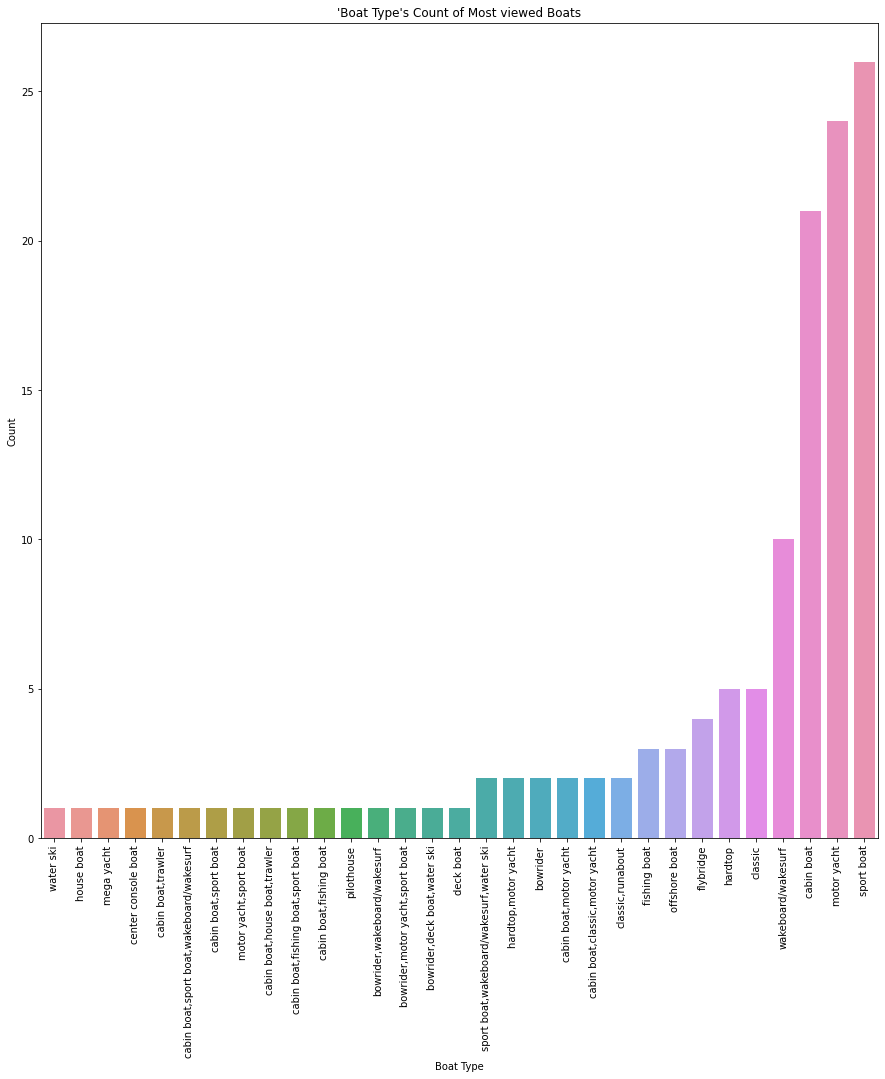

In [23]:
fig = plt.figure(figsize=(15,15))
boat_type = most_viewed.groupby('Boat Type').size().sort_values(ascending=True).reset_index()
boat_type = pd.DataFrame(boat_type)
boat_type.columns = ['Boat Type','Count']
sns.barplot(x='Boat Type',y='Count', data=boat_type)
plt.xlabel('Boat Type')
plt.ylabel('Count')
plt.title("'Boat Type's Count of Most viewed Boats")
plt.xticks(rotation=90)
plt.show()

Now the Manufacturer

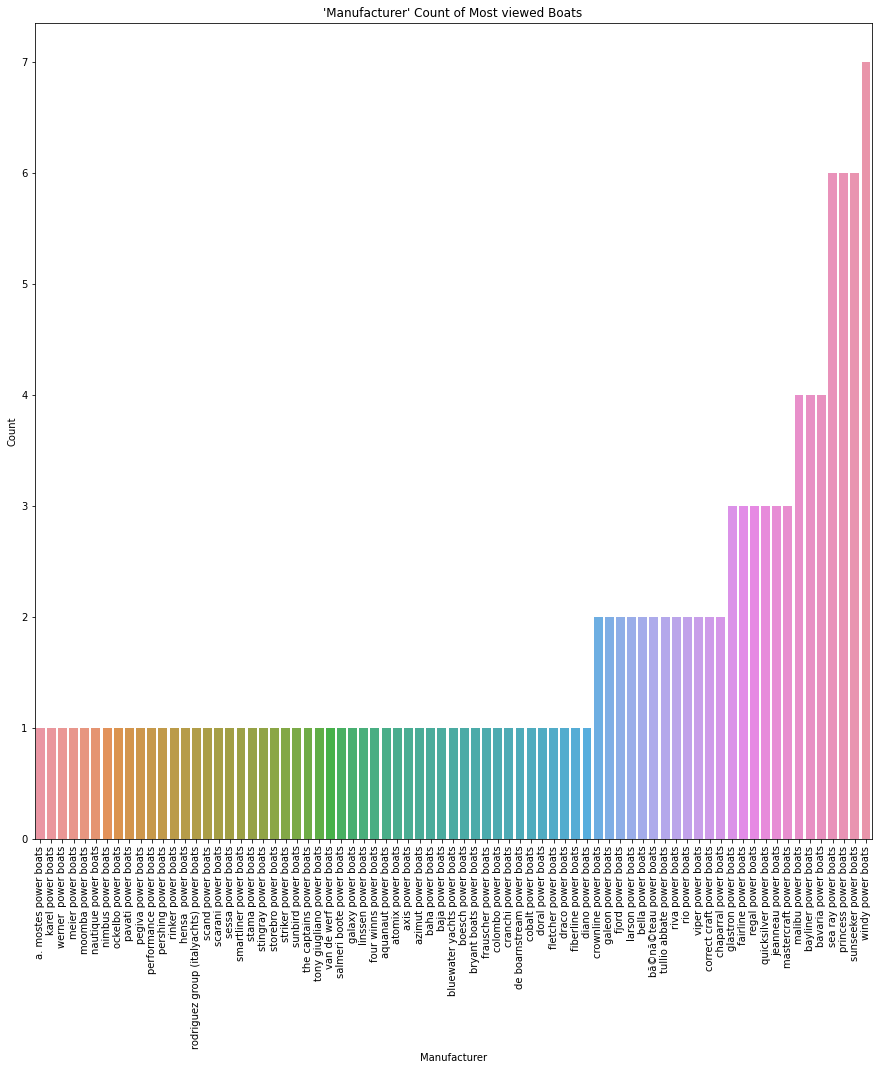

In [24]:
fig = plt.figure(figsize=(15,15))
manufact = most_viewed.groupby('Manufacturer').size().sort_values(ascending=True).reset_index()
manufact = pd.DataFrame(manufact)
manufact.columns = ['Manufacturer','Count']
sns.barplot(x='Manufacturer',y='Count', data=manufact)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title("'Manufacturer' Count of Most viewed Boats")
plt.xticks(rotation=90)
plt.show()

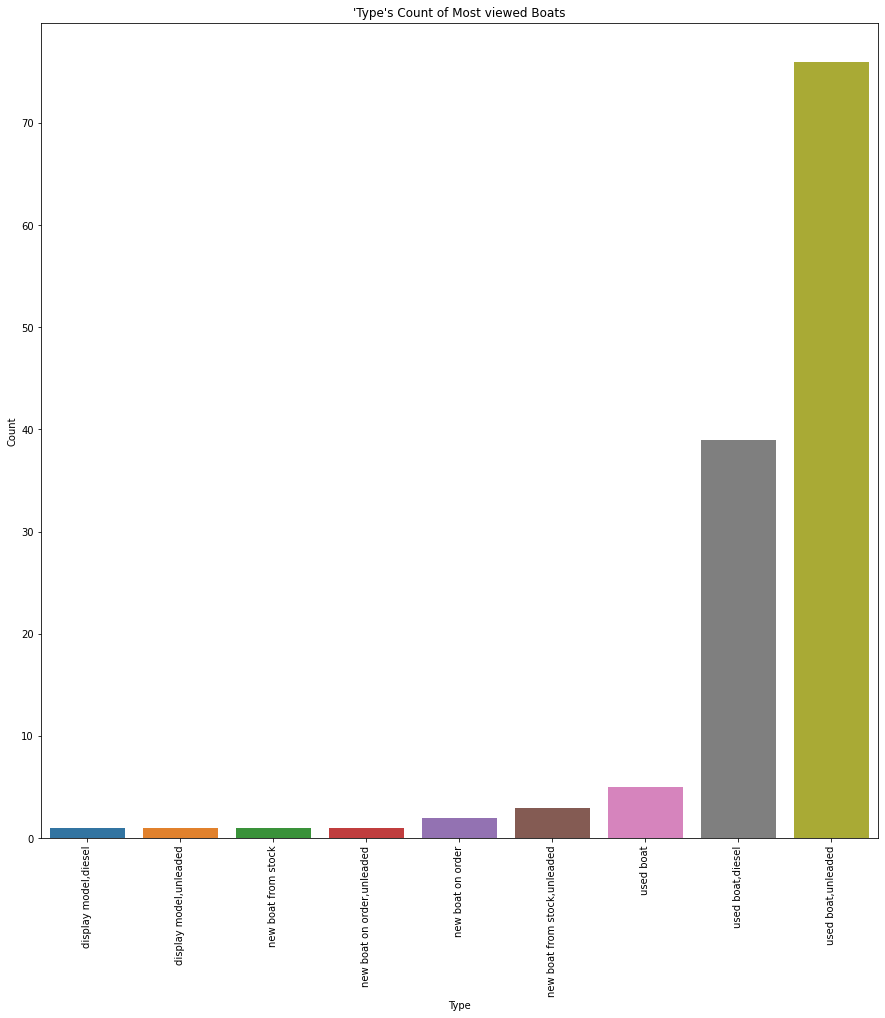

In [25]:
fig = plt.figure(figsize=(15,15))
the_type = most_viewed.groupby('Type').size().sort_values(ascending=True).reset_index()
the_type = pd.DataFrame(the_type)
the_type.columns = ['Type','Count']
sns.barplot(x='Type',y='Count', data=the_type)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("'Type's Count of Most viewed Boats")
plt.xticks(rotation=90)
plt.show()

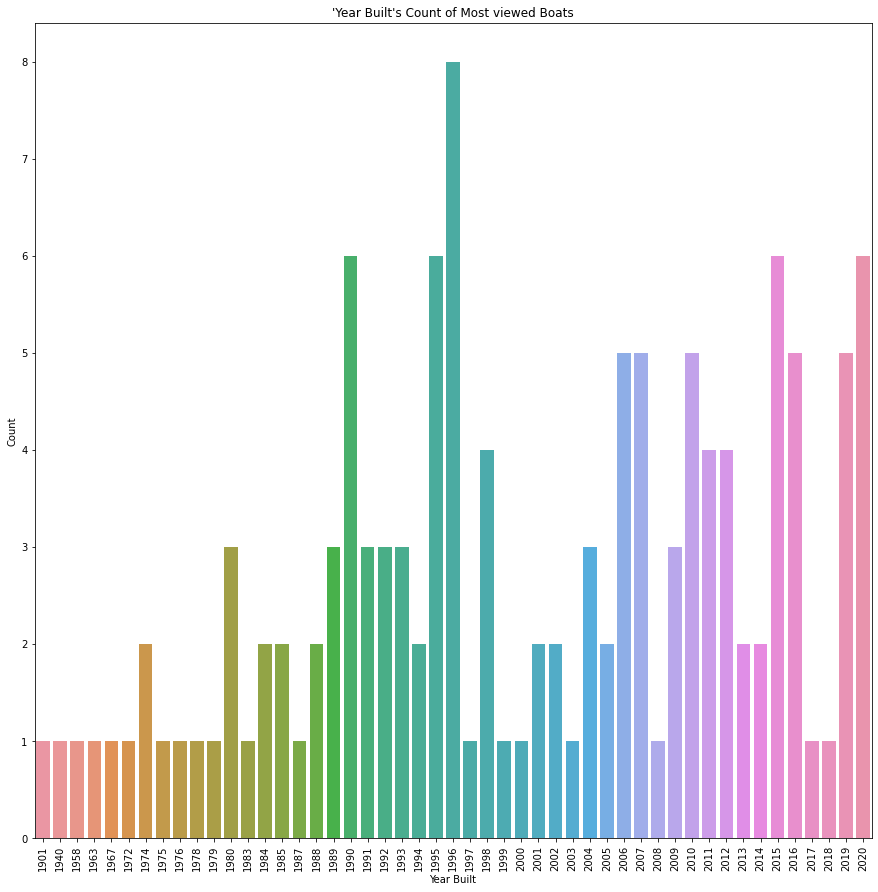

In [26]:
fig = plt.figure(figsize=(15,15))
by_year = most_viewed.groupby('Year Built').size().sort_values(ascending=True).reset_index()
by_year = pd.DataFrame(by_year)
by_year.columns = ['Year Built','Count']
sns.barplot(x='Year Built',y='Count', data=by_year)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title("'Year Built's Count of Most viewed Boats")
plt.xticks(rotation=90)
plt.show()

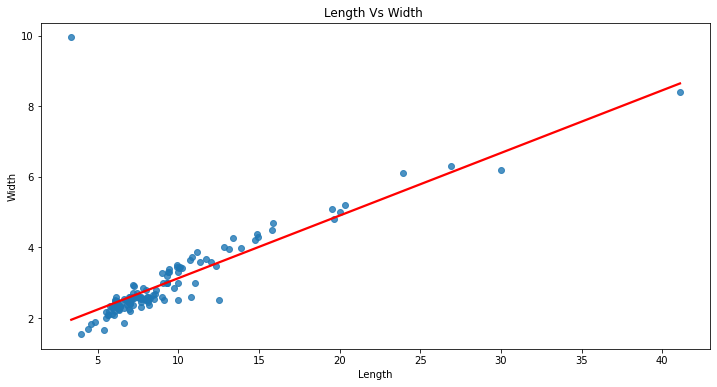

In [27]:
fig = plt.figure(figsize=(12,6))
sns.regplot(x='Length', y='Width', data=most_viewed, line_kws={"color": "red"}, ci=None)
plt.title('Length Vs Width ')
plt.show()

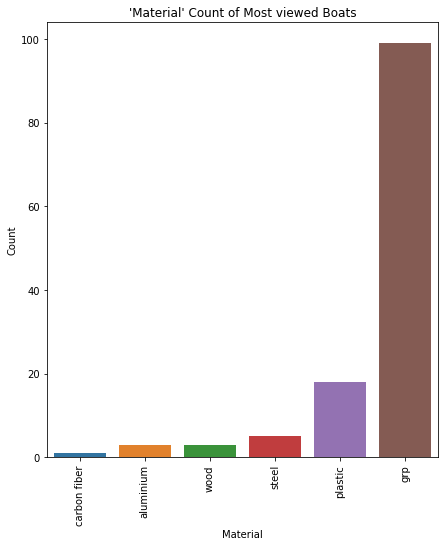

In [28]:
   fig = plt.figure(figsize=(7,8))
mat = most_viewed.groupby('Material').size().sort_values(ascending=True).reset_index()
mat = pd.DataFrame(mat)
mat.columns = ['Material','Count']
sns.barplot(x='Material',y='Count', data=mat)
plt.xlabel('Material')
plt.ylabel('Count')
plt.title("'Material' Count of Most viewed Boats")
plt.xticks(rotation=90)
plt.show()

In conclusion:
 - The most viewed boats does not necessarily be the most expensive one
 - The most frequent boat types are: 
  - Cabin boat
  - Motor yatch
  - Sport boat

- The most frequent Manufacturers are:
  - Windy power boats
  - Sunseeker power boats
  - Princess power boats
  - Searay power boats
- The most frequent Types are:
    - Used boat, unleaded
    - Used boat, diesel
- The most frequent years are:
  - 1996
  - 1990, 1995, 2016, 2020

- The most frequent Width/Length range is
  - [5,2] and [10,3]

- The most frequent Material is:
  - GRP
  - Plastic

